In [11]:
import numpy as np
np.float_ = np.float64

import pandas
import pickle

In [2]:
df = pandas.read_csv('timeseries_2011-2020.csv', low_memory=False)
df.drop('Int', axis=1, inplace=True)

- P: PV system power (W)
- Gb(i): Beam (direct) irradiance on the inclined plane (plane of the array) (W/m2)
- Gd(i): Diffuse irradiance on the inclined plane (plane of the array) (W/m2)
- Gr(i): Reflected irradiance on the inclined plane (plane of the array) (W/m2)
- H_sun: Sun height (degree)
- T2m: 2-m air temperature (degree Celsius)
- WS10m: 10-m total wind speed (m/s)
- Int: 1 means solar radiation values are reconstructed

In [3]:
df.head(20)

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m
0,20110101:0010,0.00,0.00,0.00,0.00,0.00,-10.40,2.83
1,20110101:0110,0.00,0.00,0.00,0.00,0.00,-10.86,2.69
2,20110101:0210,0.00,0.00,0.00,0.00,0.00,-11.41,2.55
3,20110101:0310,0.00,0.00,0.00,0.00,0.00,-11.43,2.28
4,20110101:0410,0.00,0.00,0.00,0.00,0.00,-11.16,2.07
5,20110101:0510,0.00,0.00,0.00,0.00,0.00,-11.29,2.00
6,20110101:0610,0.00,0.00,0.00,0.00,0.00,-11.38,2.00
7,20110101:0710,84.48,31.73,72.37,1.52,10.00,-10.13,1.86
8,20110101:0810,126.14,29.85,117.91,2.51,16.45,-8.16,1.72
9,20110101:0910,139.86,22.71,140.53,2.97,20.77,-6.27,1.66


In [4]:
# Format each row of time column
def format_to_datetime_sane(t):
    t = t.split(':')
    return f"{t[0][:4]}-{t[0][4:6]}-{t[0][6:]} {t[1][:2]}:{t[1][2:]}"

df['time'] = df['time'].apply(format_to_datetime_sane)
df['time'] = pandas.to_datetime(df['time'])

In [5]:
df.head(20)

,time,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m
0,2011-01-01 00:10:00,0.00,0.00,0.00,0.00,0.00,-10.40,2.83
1,2011-01-01 01:10:00,0.00,0.00,0.00,0.00,0.00,-10.86,2.69
2,2011-01-01 02:10:00,0.00,0.00,0.00,0.00,0.00,-11.41,2.55
3,2011-01-01 03:10:00,0.00,0.00,0.00,0.00,0.00,-11.43,2.28
4,2011-01-01 04:10:00,0.00,0.00,0.00,0.00,0.00,-11.16,2.07
5,2011-01-01 05:10:00,0.00,0.00,0.00,0.00,0.00,-11.29,2.00
6,2011-01-01 06:10:00,0.00,0.00,0.00,0.00,0.00,-11.38,2.00
7,2011-01-01 07:10:00,84.48,31.73,72.37,1.52,10.00,-10.13,1.86
8,2011-01-01 08:10:00,126.14,29.85,117.91,2.51,16.45,-8.16,1.72
9,2011-01-01 09:10:00,139.86,22.71,140.53,2.97,20.77,-6.27,1.66


# Split in train/test

In [6]:
df_train = df[df['time'] < '2020-01-01']
print(df_train.shape)
df_test = df[df['time'] >= '2020-01-01']
print(df_test.shape)

(78888, 8)
(8784, 8)


# Process for prophet

In [7]:
df_train.columns = ['ds', 'y', 'Gb', 'Gd', 'Gr', 'H_sun', 'T2m', 'WS10m']
print(df_train.head(20))


df_test.columns = ['ds', 'y', 'Gb', 'Gd', 'Gr', 'H_sun', 'T2m', 'WS10m']
print(df_test.head(20))


                    ds       y     Gb      Gd    Gr  H_sun    T2m  WS10m
0  2011-01-01 00:10:00    0.00   0.00    0.00  0.00   0.00 -10.40   2.83
1  2011-01-01 01:10:00    0.00   0.00    0.00  0.00   0.00 -10.86   2.69
2  2011-01-01 02:10:00    0.00   0.00    0.00  0.00   0.00 -11.41   2.55
3  2011-01-01 03:10:00    0.00   0.00    0.00  0.00   0.00 -11.43   2.28
4  2011-01-01 04:10:00    0.00   0.00    0.00  0.00   0.00 -11.16   2.07
5  2011-01-01 05:10:00    0.00   0.00    0.00  0.00   0.00 -11.29   2.00
6  2011-01-01 06:10:00    0.00   0.00    0.00  0.00   0.00 -11.38   2.00
7  2011-01-01 07:10:00   84.48  31.73   72.37  1.52  10.00 -10.13   1.86
8  2011-01-01 08:10:00  126.14  29.85  117.91  2.51  16.45  -8.16   1.72
9  2011-01-01 09:10:00  139.86  22.71  140.53  2.97  20.77  -6.27   1.66
10 2011-01-01 10:10:00  181.24  42.01  166.64  3.59  22.54  -3.30   1.66
11 2011-01-01 11:10:00   64.01   0.00   85.21  1.75  21.55  -1.70   1.79
12 2011-01-01 12:10:00   79.07   4.86   96.91  2.01

# Add prophet

In [8]:
from prophet import Prophet

model = Prophet(weekly_seasonality=True, daily_seasonality=True, yearly_seasonality=True, holidays=None)

In [9]:
model.add_regressor('Gb')
model.add_regressor('Gd')
model.add_regressor('Gr')
model.add_regressor('H_sun')
model.add_regressor('T2m')
model.add_regressor('WS10m')

In [10]:
model.fit(df_train)

17:00:11 - cmdstanpy - INFO - Chain [1] start processing
17:01:31 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [45]:
predictions = model.predict(df_test.drop('y', axis=1, inplace=False))

In [46]:
# Compare predictions with actual values
# print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20))

# Plot the actual values and predictions
# model.plot(predictions)
# model.plot_components(predictions)

# Calculate the mean absolute percentage error
def mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.square(y_true - y_pred))

def variance(y_true):
    y_true = np.array(y_true)
    return np.var(y_true)

mse_result = mse(df_test['y'], predictions['yhat'])
print(f'Mean Square Error: {mse_result}')

var_result = variance(df_test['y'])
print(f'Variance: {var_result}')

Mean Square Error: 82.62164729231482
Variance: 57622.09713484928


In [70]:
print(df_test.shape)
print(predictions['yhat'].shape)

print(predictions['yhat'].head(2))
print(predictions['yhat'][0])
diff = np.array(df_test['y']) - np.array(predictions['yhat'])
print(df_test['ds'].shape)
print(diff.shape)

(8784, 11)
(8784,)
0    1.401094
1    2.070561
Name: yhat, dtype: float64
1.4010944168987578
(8784,)
(8784,)


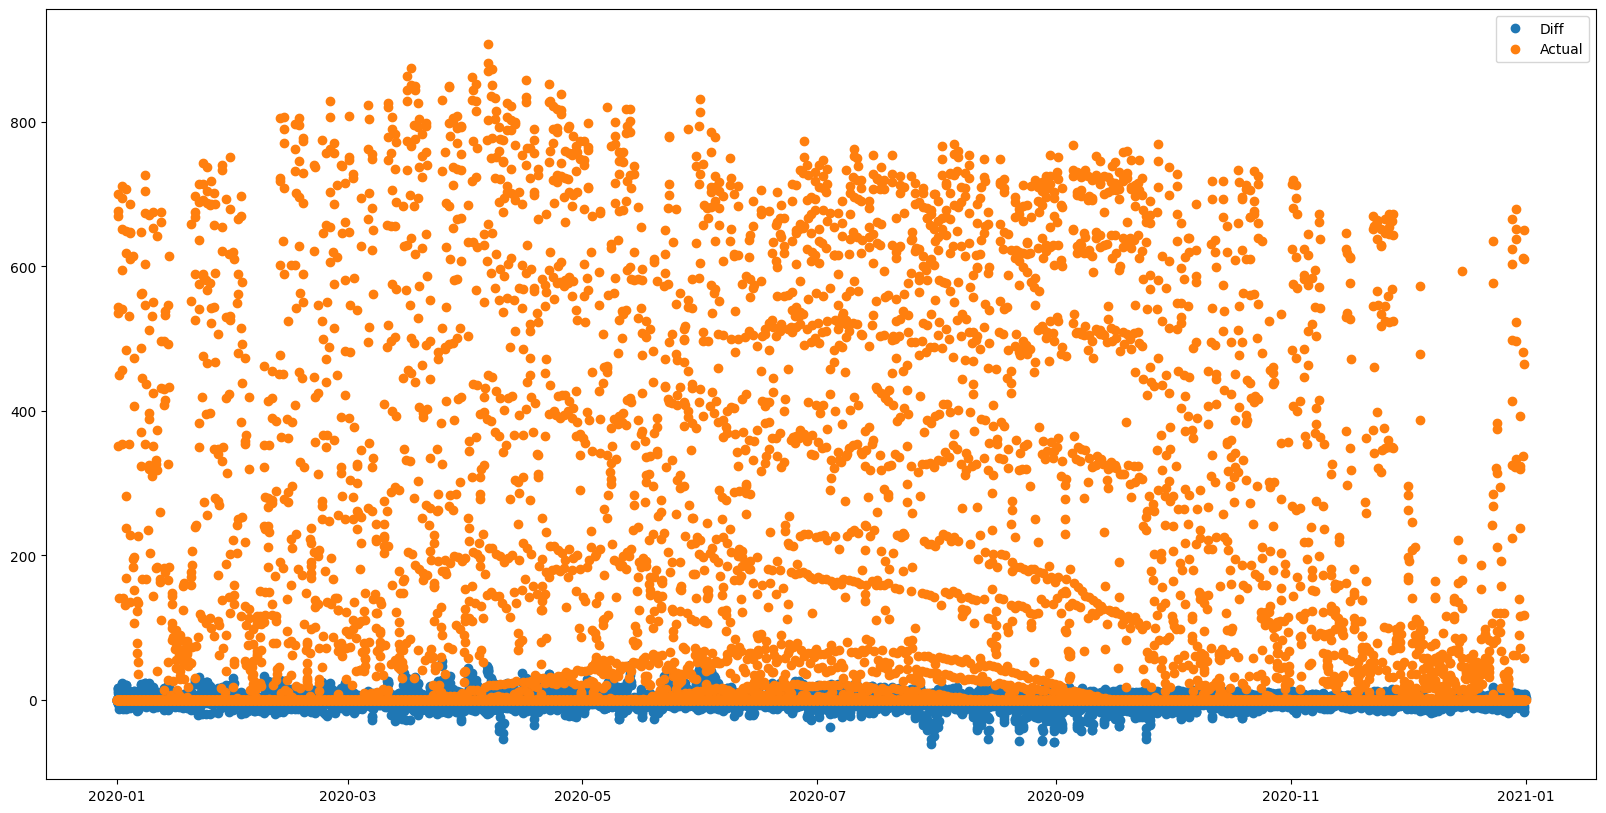

In [71]:
import matplotlib.pyplot as plt

# Plot the actual values and predictions
# Make plot points only
plt.figure(figsize=(20, 10))

plt.plot(df_test['ds'], diff, 'o', label='Diff')
plt.plot(df_test['ds'], df_test['y'], 'o', label='Actual')
plt.legend()
plt.show()